In [14]:
import pandas as pd
import numpy as np

In [27]:
df = pd.DataFrame()
df=pd.read_csv('tasas_bgta.csv', sep=',')

In [17]:
df

,Unnamed: 0,index,Unnamed: 0.1,ciudad_de_ubicaci_n,fecha_reporte_web,conteo_confirmados,conteo_recuperado,conteo_fallecidos,casos_activos,acumulado_dia_confirmados,acumulado_dia_recuperado,acumulado_dia_fallecidos,acumulado_dia_activos,tasa_contagio,Poblacion_total,tasa_recuperados
0,0,167,161,Bogotá D.C.,2020-03-06,1,1.0,0.0,0.0,1,1.0,0.0,0.0,1.700000,7412566,1.000000
1,1,168,162,Bogotá D.C.,2020-03-11,2,2.0,0.0,0.0,3,3.0,0.0,0.0,3.000000,7412566,1.000000
2,2,169,163,Bogotá D.C.,2020-03-12,2,2.0,0.0,0.0,5,5.0,0.0,0.0,1.666667,7412566,1.000000
3,3,170,164,Bogotá D.C.,2020-03-13,1,1.0,0.0,0.0,6,6.0,0.0,0.0,1.200000,7412566,1.000000
4,4,171,165,Bogotá D.C.,2020-03-14,10,10.0,0.0,0.0,16,16.0,0.0,0.0,2.666667,7412566,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,338,332,Bogotá D.C.,2020-08-28,2182,30.0,13.0,2138.0,204067,155456.0,5501.0,42774.0,1.010808,7412566,0.761789
172,172,339,333,Bogotá D.C.,2020-08-29,3338,44.0,20.0,3273.0,207405,155500.0,5521.0,46047.0,1.016357,7412566,0.749741
173,173,340,334,Bogotá D.C.,2020-08-30,1846,9.0,17.0,1819.0,209251,155509.0,5538.0,47866.0,1.008900,7412566,0.743170
174,174,341,335,Bogotá D.C.,2020-08-31,2049,0.0,10.0,2038.0,211300,155509.0,5548.0,49904.0,1.009792,7412566,0.735963


In [28]:
#Guardo mi población inicial en la variable población
poblacion=df.at[0,'Poblacion_total']
poblacion

7412566

In [29]:
suceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
suceptibles=[]
suceptibles = np.insert(suceptibles, 0, suceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(df['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(df['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)


In [30]:
#Promedio movil tasa_contagio para 300 días
for i in range(1,500):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 300 días
for i in range(1,500):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [31]:
i=1

for i in range (1,len(df)+500):
  if activos[i-1]>=suceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*suceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.014,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    suceptibles=np.insert(suceptibles,i,suceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

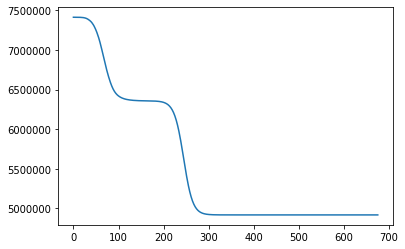

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(contagios) # plotting by columns
plt.show()

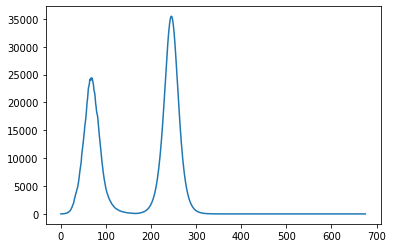

In [33]:
import numpy as np
import matplotlib.pyplot as plt
#plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
plt.plot(contagios) # plotting by columns
plt.show()

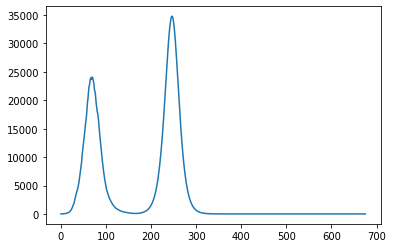

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(recuperados) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(contagios) # plotting by columns
plt.show()